# PRIVATE INVESTMENT IN EDUCATION
# Model Ben-Porath (1967)

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import HumanCapitalModelClass

# Model description



The model presented by Yed Ben-Porath in 1967 (1) applies theory from capital investment models to study the decision to invest in education in the life-cycle (here two periods). This model treats education is an investment because the individuals need time/resources to invest in it, there are uncertain future returns, and there is depreciation from losing abilities or abilities that start to be obsolete.

The model presents a representative individual whose chooses how much time to invest in education (form 0 to 1) in time t and time t+1, and how much invest in labor market, with the aim of maximizing his utility (life-time utility). Education increases human capital which increases the wages won at the labor market, and the individual is impatience ($\rho$).

The life time utility is:

$$
V =  U_t - C_t + (\frac{1}{1+\rho})[U_{t+1} - C_{t+1}]
$$

Where $U_t$ and $U_{t+1}$ are the utility from study, which is equal to the benefits of studing, i.e. the wage received at labor market which is the return of human capital; this return depends on how much labor market values human capital ($\beta_t$ and $\beta_{t+1}$). Hence, $U_t = \beta_t \cdot H_t$ and $U_{t+1} = \beta_{t+1} \cdot H_{t+1}$.

$C_t$ and $C_{t+1}$ are the cost of studying. These costs come from the direct cost of school such as fees ($\gamma$), which is the same for all individuals, plus the opportunity cost of studying because of not working for a wage. Hence, $C_t= (\gamma \cdot S_t) + (S_t \cdot \beta_t \cdot H_t)$, and $C_{t+1}= (\gamma \cdot S_{t+1}) + (S_{t+1} \cdot \beta_{t+1} \cdot H_{t+1})$

Finally, the human capital acummulation formula is:

$$
H_{t+1}=H_t (1-\delta) + (AE_tS_tH_t)^\alpha
$$

This equation represents a positive relationship between $H_{t+1}$ and $H_t$, which is concave ($\alpha < 1$), meaning a decreasing human capital production. In addition, we have $A$ which is exogeneous initial level of ability, $E_t$ which is the level of government investment in education, $S_t$ is the level of education, and $H_t$ is the previous human capital level.

Including all these equations (utility, cost and human capital accumuation), we have the following final life-utility function.

$$
V = (1-S_t) \cdot \beta_t \cdot H_t  - \gamma \cdot S_t  + (\frac{1}{1+\rho})[(1-S_{t+1})\beta_{t+1} \cdot (H_t (1-\delta) + (AE_tS_tH_t)^\alpha) - \gamma \cdot S_{t+1}]
$$

From this equation, the indidivual chooses $S_t$ and $S_{t+1}$, which have to be between 0 and 1.

## Analytical solution

The model has an analytical solucion:

$$
S_t^* = [\frac{\beta_{t+1}}{\beta_t} \cdot \frac{\alpha}{1+\rho} \cdot \frac{1}{H_t+\gamma/\beta_t} \cdot (A H_t E_t)^\alpha \cdot (1-S_{t+1})]^\frac{1}{1-\alpha}
$$

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

***Discrete Solution***

In [2]:
# Discrete Solution
model = HumanCapitalModelClass()
solution = model.solve_discrete()
legend = "The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:"
print(legend)
print("S0: {:.4f}".format(solution.S0))
print("S1: {:.4f}".format(solution.S1))
print("V: {:.4f}".format(solution.v))

The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:
S0: 0.0208
S1: 0.0000
V: 1.0395


***Countinuous solution***

Solving the model with the SLSQP method. The method minimizes a function with several variables with combinations of bounds. Thus, what is needed for this method is the bounds set and an initial guess for the variables.

In [3]:
# Continuous solution
model = HumanCapitalModelClass()
model.solve_continously()
legend = "The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:"
solution_con = model.solve_continously()

print(legend)
print("S0: {:.4f}".format(solution_con.S0))
print("S1: {:.4f}".format(solution_con.S1))
print("V: {:.4f}".format(solution_con.v))

The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:
S0: 0.0275
S1: 0.0000
V: 1.0402


**Interpretation**
The utility will be optimized when $S_t$ is 0.0275 and $S_{t+1}$ is 0. Thus, they will use 2.75 percent of their day on schooling. Meaning that with:

* $A$: initial ability = 1.0
* $E$: public expenditure in schooling = 1.0
* $H_t$: human capital at time $t$ = 1.0
* $\beta_t$ = $\beta_{t+1}$: present and future wages are equal = 0.5
* $\rho$: discount factor = 0.0025
* $\gamma$: direct cost of education = 1.0
* $\delta$: human capital does not depreciate over time = 0.0
* $\alpha$ = productivity of human capital = 0.5

The parameters chosen $A$, $E$ and $H_t$ were chosen to hold their partial effect equal. We further wanted to assume that present wage is equal future wage due to inflation. We assume that $\delta$ is 0, because we assume that human capital does not decrease over time due to the individuals skill being used all the time. The factor $\rho$, $\gamma$ and $\alpha$ are however chosen at random.

With those parameters the utility will be 1.04.



**Comparative Statics: Analysis on Schooling at period t (S0) in response to parameter changes.**

This section will analyze the change in Schooling at period t (S0) in resonse to change in the following parameters: $\gamma$, $A$, $\beta_t$, $E$ and $\rho$. We are using the continous approach to evaluate the impacts.

### The impact of Direct Cost of Schooling

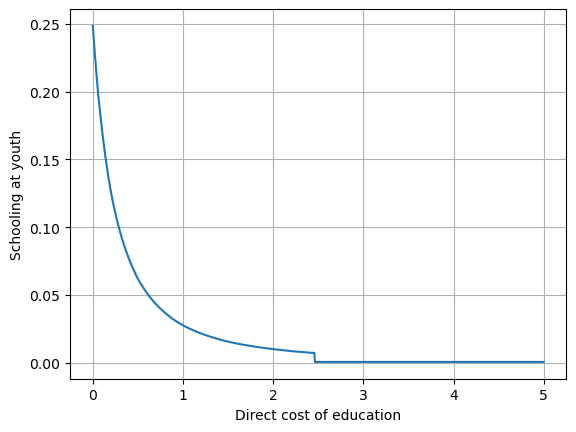

In [18]:
# Changing in direct cost of schooling (gamma)
model = HumanCapitalModelClass()

gamma_values = np.linspace(0,5, 1000)
gamma0_1 = []
S0_gamma_change = []

for a, i in enumerate(gamma_values):
    model.par.gama = i
    solution=model.solve_continously()
    gamma0_1.append(i)
    S0_gamma_change.append(solution.S0)

plt.plot(gamma0_1, S0_gamma_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Direct cost of education")
plt.grid()

**Interpretation**

An increase in the direct cost of education ($\gamma$) has a negative effect on the fraction of time people spend studying during their youth ($S0$). Ceteris Paribus, tuition costs that are too high will lead young individuals to choose not to attend school. At some point the young will choose not to spend any time at school, which is represented by the kink in the graph.

This effect can be accentuated or attenuated if other key elements are taken into account, such as the wage level ($\beta_t$) that the market grants to the accumulated human capital, i.e. if this is very high at the period t+1 and compensates for the high cost of education, then we could see a smoother curve, otherwise, in a very low wage environment the individual could be quite sensitive to a minimal increase in ($\gamma$).




### Schooling Decisions for Individuals with different initial level of Abilities

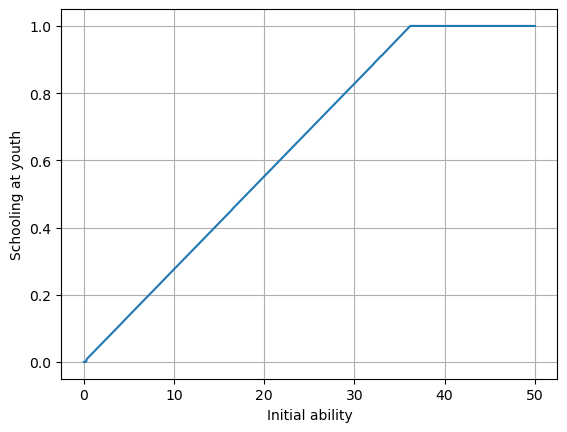

In [19]:
#Changing in ability (A)
model = HumanCapitalModelClass()

A_values = np.linspace(0,50, 100)
A0_1 = []
S0_A_change = []

for a, i in enumerate(A_values):
    model.par.A = i
    solution=model.solve_continously()
    A0_1.append(i)
    S0_A_change.append(solution.S0)

plt.plot(A0_1, S0_A_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Initial ability")
plt.grid()

**Interpretation**

Initial ability has a linear effect on schooling in youth - the higher the initial ability, the more time young people will tend to spend in school. Understood as IQ, higher initial ability may mean that young people are more prepared to gain knowledge from school and therefore gain more from schooling than those with lower initial ability. However, initial ability can also include skills in communication, creativity, problem solving and much more.

In addition, young people with higher initial ability may be more aware of the future benefits of accumulating more human capital, such as higher wages and thus a better quality of life, which would certainly encourage them to spend more time training to become more competitive in the marketplace.

### What if the present value of Wage changes?

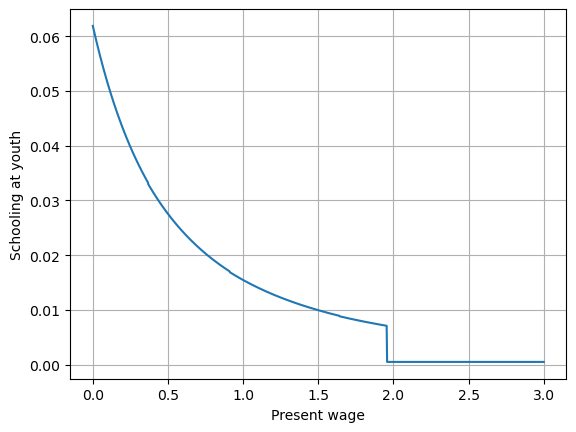

In [17]:
#Changing in present wage (b0)
model = HumanCapitalModelClass()

b0_values = np.linspace(0,3, 1000)
b0_1 = []
S0_b0_change = []

for a, i in enumerate(b0_values):
    model.par.B0 = i
    solution=model.solve_continously()
    b0_1.append(i)
    S0_b0_change.append(solution.S0)

plt.plot(b0_1, S0_b0_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Present wage")
plt.grid()

**Interpretation**

As can be seen in the graph above, the value of the wage in period t has a decreasing effect on the time young people spend on schooling. A sufficiently high wage in period t would make it more attractive for students to devote all their time to work and not attend school altogether (opportunity cost between working and studying), which is represented by the kink at around 2.0 for the present wage in the graph. However, if the future wage is relatively high compared to the current wage, individuals will prefer schooling at youth, as they know that they will receive a higher wage in the future.

### Changes in response to increased government spending on education

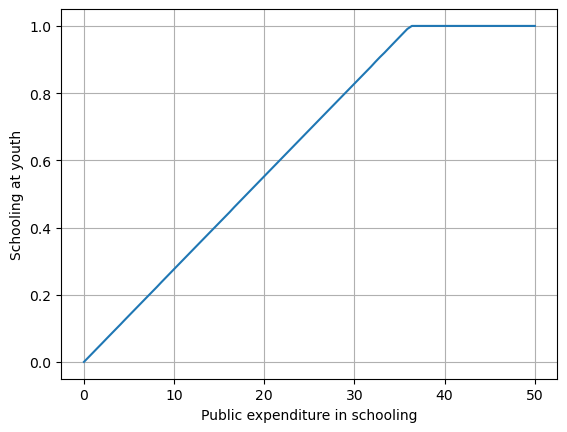

In [7]:
#Changing in public expenditure of schooling (E)
model = HumanCapitalModelClass()

E_values = np.linspace(0,50, 100)
E0_1 = []
S0_E_change = []

for a, i in enumerate(E_values):
    model.par.E = i
    solution=model.solve_continously()
    E0_1.append(i)
    S0_E_change.append(solution.S0)

plt.plot(E0_1, S0_E_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Public expenditure in schooling")
plt.grid()

**Interpretation**

Undoubtedly, the resources provided by the government for education play an important role in the decisions individuals make about how much to study. The better the infrastructure and quality of education, the more time individuals will spend studying during their youth. 

However, in a scenario of heterogeneous individuals, this greater investment could increase inequalities of origin since students with higher initial intellectual ability may benefit more from educational expenditure. At best, this could result in a neutral effect, i.e. everyone benefits in the same proportion, but without decreasing inequalities in terms of skills and knowledge acquired at school.

To remedy this, it would be worth thinking about targeted schemes, where young people with better initial intellectual ability receive greater resources in terms of education, so that the gap of origin can be closed.

### What if the representative agent is more impatient?

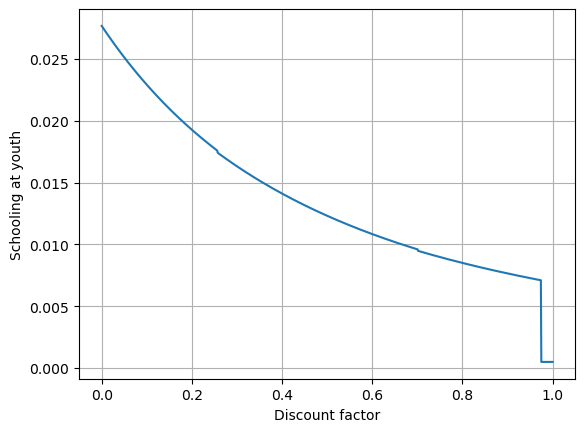

In [20]:
#Changing in discount factor (rho)
model = HumanCapitalModelClass()

rho_values = np.linspace(0,1, 1000)
rho0_1 = []
S0_rho_change = []

for a, i in enumerate(alpha_values):
    model.par.rho = i
    solution=model.solve_continously()
    rho0_1.append(i)
    S0_rho_change.append(solution.S0)

plt.plot(rho0_1, S0_rho_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Discount factor")
plt.grid()

**Interpretation**

The discount factor describes the level of patience. As can be seen in the figure above, when the individual has a high level of patience - close to 0 - he or she will prefer to spend much more time on academic training during his or her youth. However, if the person has no patience at all, then he or she will prefer to start working as soon as possible. This is represented by the kink in the graph. Thus, the young individuals will go from spending some time at school to almost no time at all, when the discount factor is close to 1.

While this is a basic model, it is worth asking what determines whether an individual is more patient or not. In many cases it may be associated with their initial socio-economic status, if they come from a poor family then they will prefer to start their working life even though they know that their future salary would be higher if they studied, as they have an immediate need for resources.

# Further analysis

In this section we evaluate effects on Schooling for period t (S0) in the presence of changes in two variables, i.e. **cross effects**, for individuals with different Unobservable Ability $A_i$.

**i)** Labour Market Reward of Human Capital. $\beta_t$

**ii)** Direct Cost of Education. $\gamma_t * S_{it}$

**iii)** Government Expenditure on Education $E_{it}$

In [10]:
# Defining the range of the parameters

As = np.linspace(0,3,11) # Individuals with different initial Unobservable Ability
B0s = np.linspace(0,1,11) # Changes in the Labour Market Reward of HK in period t
B1s = np.linspace(0,1,11) # Changes in the Labour Market Reward of HK in period t+1
Es = np.linspace(0,5,11) # Increasing of Public Expenditure on Education per person
gammas = np.linspace(-2,2,11) # Increasing in Direct Cost of Education
rhos = np.linspace(0,1,11)
deltas = np.linspace(0,1,11)
alphas = np.linspace(0,1,11)
H0s = np.linspace(0,3,11) 

### Changes in Shooling at period t (S0) in response to fluctuations in the wage salary at period t and different level of patiance

In [11]:
# Create the boxes to store the values
S0_Ex1 = np.zeros((len(B0s), len(rhos)))
model = HumanCapitalModelClass()

# Here we are looping over all possible values in the parameters E and Gamma
for j, B0 in enumerate(B0s):
    for i, rho in enumerate(rhos):
        model.par.B0 = B0
        model.par.rho = rho
        sol_1 = model.solve_continously()
        S0_Ex1[i, j] = sol_1.S0

# Here we are storing the values created before (Es and Gammas)
B0s_mesh, rhos_mesh = np.meshgrid(B0s, rhos)

# Ploting in 3D
fig = go.Figure(data=[go.Surface(x=B0s_mesh, y=rhos_mesh, z=S0_Ex1)])
# This part of the code is important because is how to set the point labels and color of the grid
fig.update_traces(
    colorscale="YlGnBu",  # Set the color scale
    hovertemplate="B0: %{x}<br>rho: %{y}<br>S0: %{z}<extra></extra>" 
)
# Just the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title="Wage at t", autorange="reversed", showgrid=True),
        yaxis=dict(title="Individual's patience", showgrid=True),
        zaxis=dict(title="Fraction of time at schooling when young", showgrid=True) 
    ),
    title="S0 responses for different levels of wage at t and patience",
    width=1000,
    height=1000
)
fig.show()

**Interpretation**

In the previous graph we can observe how the time that the individual chooses to study during his youth changes in response to fluctuations in the wage level in period t (during his youth) and his degree of patience. As expected, in a scenario in which the individual is quite impatient and the wage in period t is sufficiently high, the individual will choose to spend all his time working instead of studying.
Similarly, there is an important turning point at a patience level of 0.7 and a wage level of 0.7, at any combination of levels equal to or higher than those mentioned above, the individual will choose to only work.

### Changes in Shooling at period t (S0) in response to increases in educational resources (E) for individuals with different level of inicial ability (A)

In [12]:
# Create the boxes to store the values
S0_Ex2 = np.zeros((len(Es), len(As)))
model = HumanCapitalModelClass()

# Here we are looping over all possible values in the parameters E and Gamma
for j, E in enumerate(Es):
    for i, A in enumerate(As):
        model.par.E = E
        model.par.A = A
        sol_2 = model.solve_continously()
        S0_Ex2[i, j] = sol_2.S0

# Here we are storing the values created before (Es and Gammas)
Es_mesh, As_mesh = np.meshgrid(Es, As)

# Ploting in 3D
fig = go.Figure(data=[go.Surface(x=Es_mesh, y=As_mesh, z=S0_Ex2)])
# This part of the code is important because is how to set the point labels and color of the grid
fig.update_traces(
    colorscale="YlGn",  # Set the color scale
    hovertemplate="E: %{x}<br>A: %{y}<br>S0: %{z}<extra></extra>" 
)
# Just the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title="Resources for Education (E)", autorange="reversed", showgrid=True),
        yaxis=dict(title="Initial Ability (A)", showgrid=True),
        zaxis=dict(title="Fraction of time at schooling when young", showgrid=True)
    ),
    title="S0 responses for different levels of Education Resources (E) and levels of Initial Ability (A)",
    width=1000,
    height=1000
)
fig.show()

**Interpretation**

The graph above shows the ratio of time that would be spent studying during youth for different levels of government resources allocated to education (E) and for different levels of Initial Ability (A). As expected, individuals with higher Initial Ability will tend to take better advantage of the abundance of educational infrastructure and resources, spending up to 40% of their time, compared to those with an A close to zero, who even with a quality education will choose to spend a zero fraction of their time on education.

This may be because individuals with higher cognitive skills, either by birth or acquired at home in their early childhood years, will tend to be more aware that more schooling will allow them to have a higher level of income in their adult life.

In [13]:
# Create the boxes to store the values
S0_Ex3 = np.zeros((len(As), len(B1s)))
model = HumanCapitalModelClass()

# Here we are looping over all possible values in the parameters
for j, A in enumerate(As):
    for i, B1 in enumerate(B1s):
        model.par.A = A
        model.par.B1 = B1
        if A <= 1:
            model.par.E = 5
        elif A > 1 and A <= 2:
            model.par.E = 3
        sol_3 = model.solve_continously()
        S0_Ex3[i, j] = sol_3.S0


# Here we are storing the values created before (Es and Gammas)
As_mesh, B1s_mesh = np.meshgrid(As, B1s)

# Ploting in 3D
fig = go.Figure(data=[go.Surface(x=As_mesh, y=B1s_mesh, z=S0_Ex3)])
# This part of the code is important because is how to set the point labels and color of the grid
fig.update_traces(
    colorscale="YlOrRd",  # Set the color scale
    hovertemplate="A: %{x}<br>B1: %{y}<br>S0: %{z}<extra></extra>" 
)
# Just the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title="Initial Ability (A)", showgrid=True),
        yaxis=dict(title="Wage level at periot t+1 (B1)", showgrid=True),
        zaxis=dict(title="Fraction of time at schooling when young", showgrid=True)
    ),
    title="S0 responses for different levels of Initial Human Capital (H0) and future (B1) wage",
    width=1000,
    height=1000
)
fig.show()

**Interpretation**

This last graph is interesting, because it shows how the time spent studying changes for different levels of future income (B1) for individuals with different skill levels. Additionally, a targeted education policy was added. In the case of individuals with skills below A<=1, they were granted the highest amount of educational resources E=5, in the case of individuals with medium skills A[1,2], they were granted a lower level of educational resources E=3, and for the most skilled individuals, they were granted only one unit of educational resources.
As can be seen, this motivates more individuals to increase their study time even those with low skills.

# Conclusion

The Human Capital Model proposed by Gary Becker in his work “Human capital: a theoretical and empirical analysis, with special reference to education” (1993), has made significant contributions to our understanding of the role of education and skills in shaping individuals' economic outcomes and overall societal development. By treating human capital as an investment that yields returns over time, Becker emphasized the importance of education and training in enhancing productivity and earning potential.

The model highlights the economic rationale behind individuals' decisions to invest in education, considering factors such as the costs of education, expected future earnings, and the rate of return on education. It recognizes that education not only imparts knowledge and skills but also increases individuals' ability to adapt to changing labour market conditions, leading to improved job prospects and income growth.

One of the most interesting findings is related to the increase of resources in education by the government, a situation that, as can be seen in the graphs, mainly benefits people with better initial capacities. This is relevant since the initial advantage could be explained not only by genes but also by belonging to wealthy families, who can invest more in the pre-school development of their children; in this case the best recommendation in terms of public policy is to opt for a targeted scheme, where resources for education are allocated to those with lower abilities, which could be people with disabilities or low income, in order to level the playing field for all.

Finally, The Human Capital Model also has been influential in guiding policies aimed at promoting human capital development, given that it underscores the value of investing in education, vocational training, and lifelong learning to enhance individuals' skills, innovation, and productivity.